# 分类精度（accuracy）

## Step 1: Read the data into Pandas

In [30]:
import pandas as pd
url = 'titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Create X and y

In [31]:
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

## Step 3: Split the data into training and testing sets

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Step 4: Fit a logistic regression model and examine the coefficients

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
list(zip(feature_cols, logreg.coef_[0]))

[('Pclass', -0.88190419239277), ('Parch', 0.3424041361658124)]

## Step 5: Make predictions on the testing set and calculate the accuracy

In [34]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

In [35]:
# calculate classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6681614349775785


## Step 6: Compare your testing accuracy to the null accuracy

In [36]:
# this works regardless of the number of classes
y_test.value_counts().head(1) / len(y_test)

0    0.573991
Name: Survived, dtype: float64

In [37]:
# this only works for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.5739910313901345

# 混淆矩阵（confusion matrix）

In [38]:
# print confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[105  23]
 [ 51  44]]


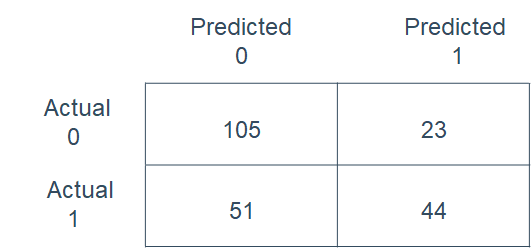

In [39]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [40]:
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 44
True Negatives: 105
False Positives: 23
False Negatives: 51


## 从混淆矩阵计算出的评价指标

### Accuracy

In [41]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6681614349775785
0.6681614349775785


### Sensitivity / Recall

In [42]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.4631578947368421
0.4631578947368421


### Specificity

In [43]:
print(TN / float(TN + FP))

0.8203125


### Precision

In [44]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.6567164179104478
0.6567164179104478


### F1 score

In [45]:
P = metrics.precision_score(y_test, y_pred_class)
R = metrics.recall_score(y_test, y_pred_class)
print(2*P*R/(P+R))
print(metrics.f1_score(y_test, y_pred_class))

0.5432098765432098
0.5432098765432098


## 调节分类阈值

In [46]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [47]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.3913502 , 0.6086498 ],
       [0.7895422 , 0.2104578 ],
       [0.60832192, 0.39167808],
       [0.7895422 , 0.2104578 ],
       [0.43916678, 0.56083322],
       [0.7895422 , 0.2104578 ],
       [0.43916678, 0.56083322],
       [0.3913502 , 0.6086498 ],
       [0.3913502 , 0.6086498 ],
       [0.7895422 , 0.2104578 ]])

In [48]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

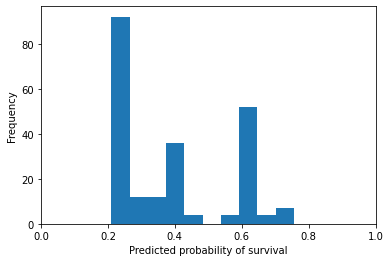

In [49]:
# histogram of predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [50]:
# increase sensitivity by lowering the threshold for predicting survival
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], threshold=0.3)[0]

In [51]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.6086498 , 0.2104578 , 0.39167808, 0.2104578 , 0.56083322,
       0.2104578 , 0.56083322, 0.6086498 , 0.6086498 , 0.2104578 ])

In [52]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 0., 1., 0., 1., 0., 1., 1., 1., 0.])

In [53]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[105  23]
 [ 51  44]]


In [54]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[72 56]
 [32 63]]


In [55]:
# sensitivity has increased (used to be 0.46)
print(63/float(63+32))

0.6631578947368421


In [56]:
# specificity has decreased (used to be 0.82)
print(72/float(72+56))

0.5625


# ROC曲线和AUC

如果你想看到所有可能的阈值如何影响模型的sensitivity和specificity，可以绘制ROC曲线

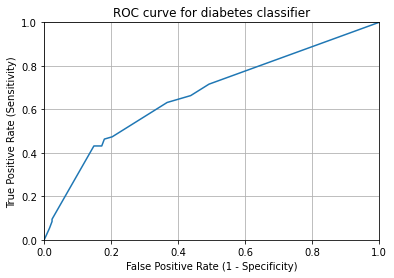

In [57]:
# IMPORTANT: first argument is true values, second argument is predicted PROBABILITIES
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [58]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [62]:
thresholds, tpr, fpr

(array([1.75518289, 0.75518289, 0.68655112, 0.64266468, 0.6086498 ,
        0.5962472 , 0.56083322, 0.47555455, 0.39167808, 0.34584359,
        0.27293861, 0.2104578 ]),
 array([0.        , 0.05263158, 0.08421053, 0.09473684, 0.43157895,
        0.43157895, 0.46315789, 0.47368421, 0.63157895, 0.66315789,
        0.71578947, 1.        ]),
 array([0.       , 0.015625 , 0.0234375, 0.0234375, 0.1484375, 0.171875 ,
        0.1796875, 0.203125 , 0.3671875, 0.4375   , 0.4921875, 1.       ]))

In [61]:
evaluate_threshold(0.5)

Sensitivity: 0.4631578947368421
Specificity: 0.8203125


In [63]:
evaluate_threshold(0.3)

Sensitivity: 0.6631578947368421
Specificity: 0.5625


AUC表示ROC曲线下部分在整个ROC曲线图中占的比例

In [64]:
# IMPORTANT: first argument is true values, second argument is predicted PROBABILITIES
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.66796875


AUC适合作为对分类器的一个单独的评价指标

In [65]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.695323911382735